<a href="https://colab.research.google.com/github/mariaSzepek/Detecting-Disasters-from-Tweets/blob/main/LSTM_model_for_disaster_prediction_from_tweets_with_word_augmentor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Dropout, Input, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files

In [ ]:
!pip install nlpaug

In [ ]:
data= pd.read_csv("Data Mining.csv")

In [ ]:
raw_data = pd.read_csv("Data Mining.csv")
print("Data points count: ", raw_data['id'].count())
raw_data.head()

Data points count:  11370


id keyword  ...                                               text target
0   0  ablaze  ...  Communal violence in Bhainsa, Telangana. "Ston...      1
1   1  ablaze  ...  Telangana: Section 144 has been imposed in Bha...      1
2   2  ablaze  ...  Arsonist sets cars ablaze at dealership https:...      1
3   3  ablaze  ...  Arsonist sets cars ablaze at dealership https:...      1
4   4  ablaze  ...  "Lord Jesus, your love brings freedom and pard...      0

[5 rows x 5 columns]

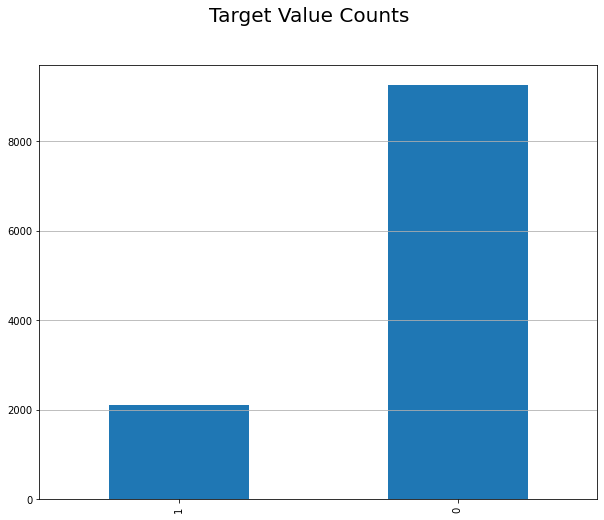

In [ ]:
# Plotting target value counts
plt.figure(figsize=(10,8))
ax = raw_data['target'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("Target Value Counts", fontsize=20)
plt.show()

In [ ]:
print("Number of missing data for column keyword: ", raw_data['keyword'].isna().sum())
print("Number of missing data for column location: ", raw_data['location'].isna().sum())
print("Number of missing data for column text: ", raw_data['text'].isna().sum())
print("Number of missing data for column target: ", raw_data['target'].isna().sum())

Number of missing data for column keyword:  0
Number of missing data for column location:  3418
Number of missing data for column text:  0
Number of missing data for column target:  0


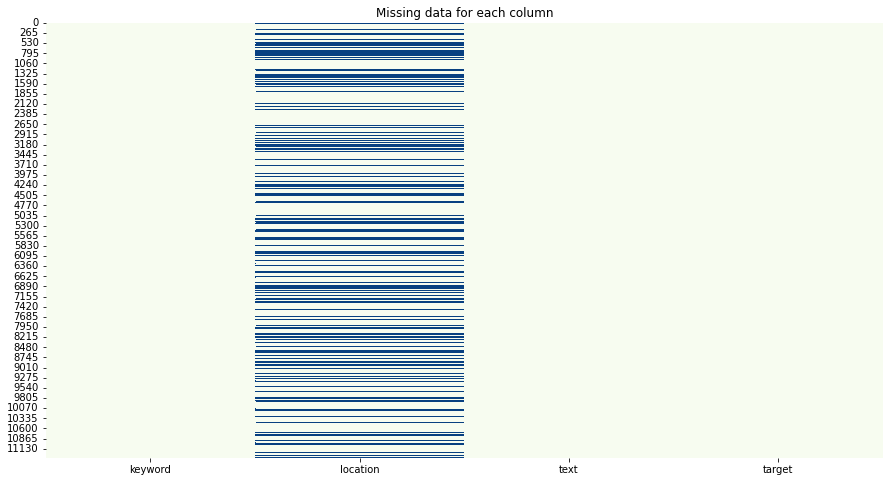

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(raw_data.drop('id', axis=1).isnull(), cbar=False, cmap="GnBu").set_title("Missing data for each column")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


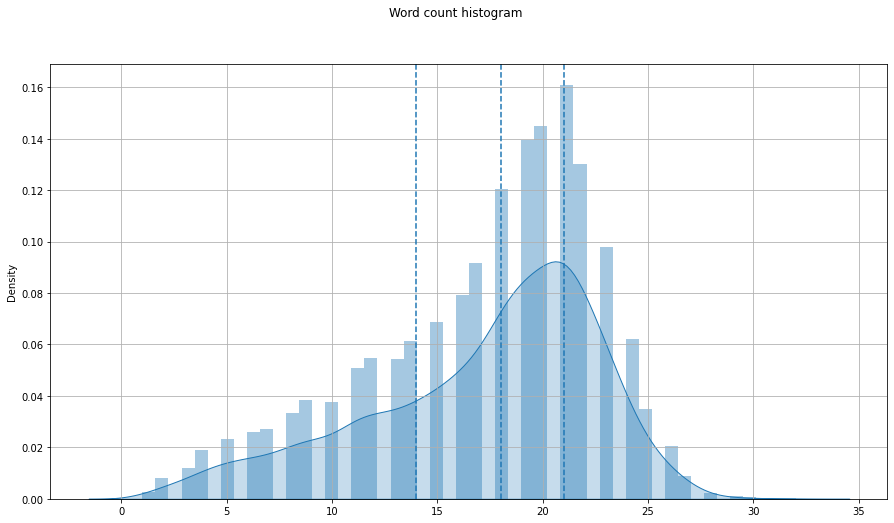

In [ ]:
plt.figure(figsize=(15,8))
raw_data['word_count'] = raw_data['text'].apply(lambda x: len(x.split(" ")) )
sns.distplot(raw_data['word_count'].values, hist=True, kde=True, kde_kws={"shade": True})
plt.axvline(raw_data['word_count'].describe()['25%'], ls="--")
plt.axvline(raw_data['word_count'].describe()['50%'], ls="--")
plt.axvline(raw_data['word_count'].describe()['75%'], ls="--")

plt.grid()
plt.suptitle("Word count histogram")
plt.show()

# remove rows with under 3 words
raw_data = raw_data[raw_data['word_count']>2]
raw_data = raw_data.reset_index()

In [ ]:
print("25th percentile: ", raw_data['word_count'].describe()['25%'])
print("mean: ", raw_data['word_count'].describe()['50%'])
print("75th percentile: ", raw_data['word_count'].describe()['75%'])

25th percentile:  14.0
mean:  19.0
75th percentile:  21.0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
from tqdm import tqdm
import nlpaug.augmenter.word as naw


In [ ]:
from nlpaug.util.file.download import DownloadUtil

DownloadUtil.download_word2vec(dest_dir='.') # word2vec
DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') # GloVe
DownloadUtil.download_fasttext(model_name='wiki-news-300d-1M', dest_dir='.') # fasttext model

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Word Augmenter
import nlpaug.augmenter.word as naw

In [ ]:
len(raw_data.text[raw_data.target==1])

2111

In [ ]:
data.sample(4)

id  ... target
412    412  ...      0
279    279  ...      0
6409  6409  ...      0
5777  5777  ...      0

[4 rows x 5 columns]

In [ ]:
raw_data.text[0]

'Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'

In [ ]:
aug.augment?

In [ ]:
import numpy as np

In [ ]:
np.nan

nan

In [ ]:
raw_data.text[raw_data.target==1][10]

'Images showing the havoc caused by the #Cameroon military as they torched houses in #Oku.The shameless military is reported…'

In [ ]:
augmented_text = aug.augment("Images showing the havoc caused by the #Cameroon military as they torched houses in #Oku.The shameless military is reported…",3)
for i in (augmented_text):
  print(i)

Images showing the mayhem caused by the # Republic of cameroon military as they torch house in # Oku. The shameless military be report …
Effigy showing the havoc caused by the # Cameroon military as they torched home in # Oku. The unblushing military machine represent reported …
Mental image showing the havoc caused by the # Cameroon military as they torch houses in # Oku. The shameless military be describe …


In [ ]:
new_row = {'name':'Geo', 'physics':np.nan, 'chemistry':'Images showing the havoc caused by the #Cameroon military as they torched houses in #Oku.The shameless military is reported…'}

In [ ]:
len(data)

11370

In [ ]:
data

id  ... target
0          0  ...      1
1          1  ...      1
2          2  ...      1
3          3  ...      1
4          4  ...      0
...      ...  ...    ...
11365  11365  ...      0
11366  11366  ...      0
11367  11367  ...      0
11368  11368  ...      0
11369  11369  ...      1

[11370 rows x 5 columns]

In [ ]:
# Synonym
# len(data)
print(len(data))
x = len(data)
aug = naw.SynonymAug(aug_src='wordnet')
for i, text in enumerate(data.text[data.target==1]):
  augmented_text = aug.augment(text,3)
  for i in augmented_text:
    x=x+1
    new_row = {'id':x, 'keyword':'f', 'location':'f', 'text':i,'target':1}
    data = data.append(new_row, ignore_index=True)

len(data)
  


# new_row = {'id':np.nan, 'keyword':np.nan, 'location':np.nan, 'text':92}
# #append row to the dataframe
# df_marks = df_marks.append(new_row, ignore_index=False)

11371

In [ ]:
len(data)

17712

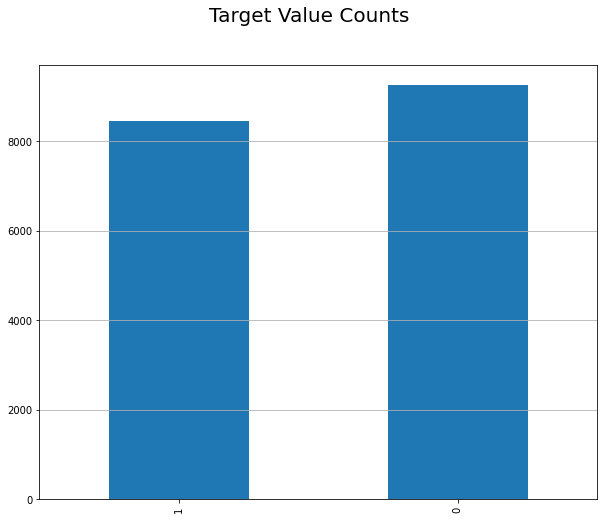

In [ ]:
# Plotting target value counts
plt.figure(figsize=(10,8))
ax = data['target'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("Target Value Counts", fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


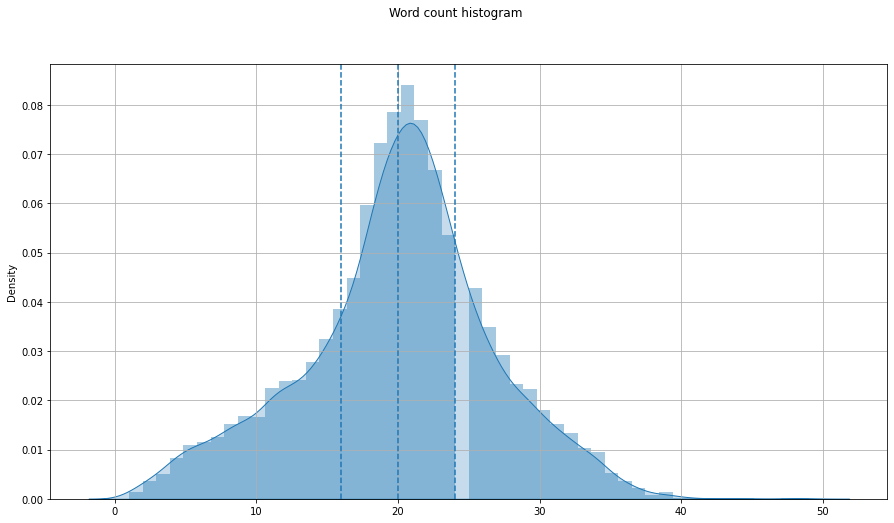

In [ ]:
plt.figure(figsize=(15,8))
data['word_count'] = data['text'].apply(lambda x: len(x.split(" ")) )
sns.distplot(data['word_count'].values, hist=True, kde=True, kde_kws={"shade": True})
plt.axvline(data['word_count'].describe()['25%'], ls="--")
plt.axvline(data['word_count'].describe()['50%'], ls="--")
plt.axvline(data['word_count'].describe()['75%'], ls="--")

plt.grid()
plt.suptitle("Word count histogram")
plt.show()

# remove rows with under 3 words
data = data[data['word_count']>2]
data = data.reset_index()

In [ ]:
print("25th percentile: ", data['word_count'].describe()['25%'])
print("mean: ", data['word_count'].describe()['50%'])
print("75th percentile: ", data['word_count'].describe()['75%'])

25th percentile:  16.0
mean:  20.0
75th percentile:  24.0


In [ ]:
aug = naw.SynonymAug(aug_src='ppdb', model_path="ppdb-2.0-tldr/ppdb-2.0-tldr") # Change Path to your directory
# for i, text in enumerate(raw_data.text):
#     augmented_text = aug.augment(text)
#     print(f"{i + 1}:", augmented_text)

FileNotFoundError: ignored

In [ ]:
for i, text in enumerate(raw_data.text):
  print(text)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
I’m loving this heat wave of 10 degrees in Anchorage, AK. I even drove around with my windows rolled down. Yes, 10… https://t.co/5PWZOeYK4a
Thrilled to announce that Feb 10 will broadcast the TV Premiere of COOKED: SURVIVAL BY ZIP CODE (…
This wasn’t exactly what she was expecting. She blinked a few times before a wave of heat clouded her head — a blus… https://t.co/q8gRGAzhsn
I'm back on the beach-wave-with-no-heat kick. Braids for 24 hours shoved under my Army hat, took them out and… https://t.co/ydzmxA27MG
heat wave | 📎 https://t.co/iYyS949Lgz https://t.co/kllagaVGtd
According to HuffPost, the "5 Environmental News Stories To Watch In 2020" reflect the ongoing, pervasive status of… https://t.co/jjcsbl9OZn
A January heat wave engulfed the eastern half of the country.... The magnitude of the warmth was yet another remind… https://t.co/BVZASp3GAY
Rescue dog in city care dies en route to new home during heat w

In [ ]:
len(raw_data.text)

17627

In [ ]:
raw_data = data

In [ ]:
# Clean text columns
#stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')


def clean_text(each_text):

    # remove URL from text
    each_text_no_url = re.sub(r"http\S+", "", each_text)
    
    # remove numbers from text
    text_no_num = re.sub(r'\d+', '', each_text_no_url)

    # tokenize each text
    word_tokens = word_tokenize(text_no_num)
    
    # remove sptial character
    clean_text = []
    for word in word_tokens:
        clean_text.append("".join([e for e in word if e.isalnum()]))

    # remove  lower
    text_with_no_stop_word = [w.lower() for w in clean_text] # if not w in stop_words  

    # do stemming
    stemmed_text = [stemmer.stem(w) for w in text_with_no_stop_word]
    
    return " ".join(" ".join(stemmed_text).split())


raw_data['clean_text'] = raw_data['text'].apply(lambda x: clean_text(x) )
raw_data['keyword'] = raw_data['keyword'].fillna("none")
raw_data['clean_keyword'] = raw_data['keyword'].apply(lambda x: clean_text(x) )

In [ ]:
# Combine column 'clean_keyword' and 'clean_text' into one
raw_data['keyword_text'] = raw_data['clean_keyword'] + " " + raw_data["clean_text"]

In [ ]:
feature = 'keyword_text'
label = "target"

# split train and test
X_train, X_test,y_train, y_test = model_selection.train_test_split(raw_data[feature],
                                                                   raw_data[label],
                                                                   test_size=0.3,
                                                                   random_state=0, 
                                                                   shuffle=True)

In [ ]:
X_train

5873     flood our so far australia bushfir world war t...
13667    f monster rubbl violent storm blanket respect ...
439      armi after the most brutal and provoc statemen...
16162    f china swallow hole six kill as ground swallo...
16775              f this electr storm is amaz regist nurs
                               ...                        
9225     siren in less than week amp are back in dublin...
13123    f rt palestinechron sion to destroy home of pa...
9845     surviv stan exo is a rollercoast ride full of ...
10799    weapon the good gear exchang it at mor dhona t...
2732     crush i do nt realli know if i realli have cru...
Name: keyword_text, Length: 12338, dtype: object

In [ ]:
# End data prep for our purposes 

In [ ]:
X_train_GBC = X_train.values.reshape(-1)
x_test_GBC = X_test.values.reshape(-1)

In [ ]:
X_train_GBC

array(['flood our so far australia bushfir world war threat from us amp iran flash flood in indonesia puerto ri',
       'f monster rubbl violent storm blanket respect australian state liothyronin co ccqgxqja grandsolar',
       'armi after the most brutal and provoc statement of the dgispr should an alreadi butcher be butcher again we are forc',
       ...,
       'surviv stan exo is a rollercoast ride full of emot amp surpris we ve surviv member leav date scandal militari',
       'weapon the good gear exchang it at mor dhona to augment them you have to go to uh some place in the',
       'crush i do nt realli know if i realli have crush on him tho so yeah'],
      dtype=object)

In [ ]:
# Vectorize text
vectorizer = CountVectorizer()
X_train_GBC = vectorizer.fit_transform(X_train_GBC)
x_test_GBC = vectorizer.transform(x_test_GBC)

In [ ]:
# Train the model
model = ensemble.GradientBoostingClassifier(learning_rate=0.1,                                            
                                            n_estimators=2000,
                                            max_depth=9,
                                            min_samples_split=6,
                                            min_samples_leaf=2,
                                            max_features=8,
                                            subsample=0.9)
model.fit(X_train_GBC, y_train)

GradientBoostingClassifier(max_depth=9, max_features=8, min_samples_leaf=2,
                           min_samples_split=6, n_estimators=2000,
                           subsample=0.9)

In [ ]:
# Evaluate the model
predicted_prob = model.predict_proba(x_test_GBC)[:,1]
predicted = model.predict(x_test_GBC)

accuracy = metrics.accuracy_score(predicted, y_test)
print("Test accuracy: ", accuracy)
print(metrics.classification_report(y_test, predicted, target_names=["0", "1"]))
print("Test F-scoare: ", metrics.f1_score(y_test, predicted))

Test accuracy:  0.9192664019663452
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2767
           1       0.94      0.88      0.91      2522

    accuracy                           0.92      5289
   macro avg       0.92      0.92      0.92      5289
weighted avg       0.92      0.92      0.92      5289

Test F-scoare:  0.9124461759278245


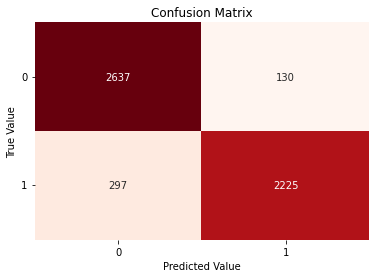

In [ ]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)

plt.show()

In [ ]:
# LSTM starts from here

In [ ]:
# url = "http://nlp.stanford.edu/data/glove.6B.zip"
# Get the data with wget and the URL

# !wget -cq http://nlp.stanford.edu/data/glove.6B.zip


In [ ]:
#now you have the compressed data uploaded to your Colab, unzip it using the following command line:
#import zipfile

#zip_ref = zipfile.ZipFile("/content/glove.6B.zip", 'r')
#zip_ref.extractall()
#zip_ref.close()

In [ ]:
# Define some hyperparameters
path_to_glove_file = '/content/glove.6B.300d.txt' # download link: http://nlp.stanford.edu/data/glove.6B.zip
embedding_dim = 300
learning_rate = 1e-3
batch_size = 1024
epochs = 2
sequence_len = 100



In [ ]:
y_train

5873     0
13667    1
439      1
16162    1
16775    1
        ..
9225     0
13123    1
9845     0
10799    0
2732     0
Name: target, Length: 12338, dtype: int64

In [ ]:
# Define train and test labels
y_train_LSTM = y_train.values.reshape(-1,1)
y_test_LSTM = y_test.values.reshape(-1,1)

print("Training Y shape:", y_train_LSTM.shape)
print("Testing Y shape:", y_test_LSTM.shape)

Training Y shape: (12338, 1)
Testing Y shape: (5289, 1)


In [ ]:
y_train_LSTM

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Tokenize train data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("Vocabulary Size: ", vocab_size)

Vocabulary Size:  16976


In [ ]:
# Pad train and test 
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=sequence_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=sequence_len)

print("Training X shape: ", X_train.shape)
print("Testing X shape: ", X_test.shape)

Training X shape:  (12338, 100)
Testing X shape:  (5289, 100)


In [ ]:
# Read word embeddings
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embeddings_index

{'the': array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
         2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
        -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
         2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
        -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
        -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
         9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
        -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
         1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
         2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
         1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
         2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
        -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
        -4.4640e-01,  1.7197e-01,  4.6246e-0

In [ ]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Define embedding layer in Keras
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, SimpleRNN, LSTM, Activation

In [ ]:
# Build and compile the model
model = Sequential()

In [ ]:
# WORKING AND REASONABLE CODE!!!!!!!

# Build and compile the model
model = Sequential() # True

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            weights=[embedding_matrix],
                                            input_length=sequence_len,
                                            trainable=False)

# model.add(embedding_layer)
# # model.add(Dropout(0.2))

# # model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.5))
# model.add(LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.2))
# model.add(LSTM(64, return_sequences=False, dropout=0.5, recurrent_dropout=0.2)) ##evtl behalten
# # model.add(Dense(16)) #behalten
# # model.add(Dropout(rate=0.25))
# model.add(Dense(1, activation='relu'))
# model.add(Dropout(rate=0.5))
# model.summary()



# kind of working
# model.add(embedding_layer)

# model.add(LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.2))
# model.add(LSTM(64, return_sequences=False, dropout=0.5, recurrent_dropout=0.2)) ##evtl behalten
# model.add(Dense(1, activation='relu'))
# model.add(Dropout(rate=0.5))
# model.summary()

model.add(embedding_layer)

model.add(LSTM(128, return_sequences=True, dropout=0.5, recurrent_dropout=0.2))
model.add(LSTM(128, return_sequences=False, dropout=0.5, recurrent_dropout=0.2)) ##evtl behalten

model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()




model.add(embedding_layer)


model.add(LSTM(128, return_sequences=False, dropout=0.5, recurrent_dropout=0.2)) ##evtl behalten

model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()









# x = Conv1D(128, 5, activation='relu')(embedding_sequences)
# x = Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.2))(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# outputs = Dense(1, activation='sigmoid')(x)
# model = Model(sequence_input, outputs)
# model.summary()



# model.add(embedding_layer)

# model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
# model.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
# model.add(LSTM(16))
# model.add(Dropout(rate=0.25))


# model.add(embedding_layer)

# model.add(Dropout(0.5))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('softmax'))





# sequence_input = Input(shape=(sequence_len, ), dtype='int32')
# embedding_sequences = embedding_layer(sequence_input)

# x = Conv1D(128, 5, activation='relu')(embedding_sequences)
# x = Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.2))(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# outputs = Dense(1, activation='sigmoid')(x)
# model = Model(sequence_input, outputs)
# model.summary()















Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5092800   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          219648    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 5,444,161
Trainable params: 351,361
Non-trainable params: 5,092,800
_________________________________________________________________
Model: "sequential_1"
________________

In [ ]:
# This is for metrics cause its been thrown out see: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
import tensorflow as tf 

# model.compile( ..., metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
# , tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
# 'accuracy'

In [ ]:
embedding_dim = 300
learning_rate = 1e-3
batch_size = 1024
epochs = 10
sequence_len = 100

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
#model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
#Adam(learning_rate=learning_rate)
# 'adam'


In [ ]:
# Train the LSTM Model
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_data=(X_test, y_test))



Epoch 1/10
13/13 [==============================] - 72s 5s/step - loss: 0.6928 - accuracy: 0.5200 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6924 - val_accuracy: 0.5232 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 64s 5s/step - loss: 0.6926 - accuracy: 0.5200 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6922 - val_accuracy: 0.5232 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 64s 5s/step - loss: 0.6924 - accuracy: 0.5200 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6921 - val_accuracy: 0.5232 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 65s 5s/step - loss: 0.6924 - accuracy: 0.5200 - f1_m: 0.0000e+00 - precision_m: 0.00

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
# Print the obtained loss and accuracy
#print("Loss: {0}\nAccuracy: {1}\nAccuracy: {2}\nAccuracy: {3}".format(*model.evaluate(X_test, y_test, verbose=0)))
print("Loss: {0}\nAccuracy: {1}\nF1-Score: {2}\nPrecision: {3}\nRecall: {4}".format(*model.evaluate(X_test, y_test, verbose=0)))


Loss: 0.6920740604400635
Accuracy: 0.5231612920761108
F1-Score: 0.0
Precision: 0.0
Recall: 0.0


In [ ]:
# Try at least two different network configurations of RNN (LSTM) by varying the
# number of hidden layers you use for the models. And finally compare the classification
# accuracies of these two network configurations.

# SO COMPARE ACC NOW


In [ ]:
# Evaluate the model
predicted = model.predict(X_test, verbose=1, batch_size=10000)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy, a, b, c = model.evaluate(X_test, y_test, batch_size=10000)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(y_test), y_predicted))

1/1 [==============================] - 26s 26s/step - loss: 0.6921 - accuracy: 0.5232 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Test Accuracy:  0.5231612920761108
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      2767
           1       0.00      0.00      0.00      2522

    accuracy                           0.52      5289
   macro avg       0.26      0.50      0.34      5289
weighted avg       0.27      0.52      0.36      5289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Compute the confusion matrix- False positives, False négatives, True positives, True
# negatives

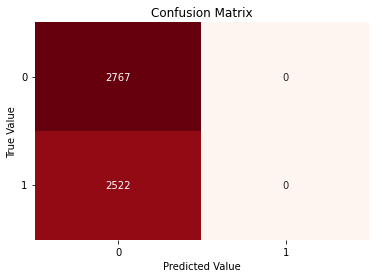

In [ ]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_predicted)

print("Confusion Matrix")
print(conf_matrix)


Confusion Matrix
[[2767    0]
 [2522    0]]


In [ ]:
# Plot the accuracy and loss (y-axis) and epochs (x-axis) 

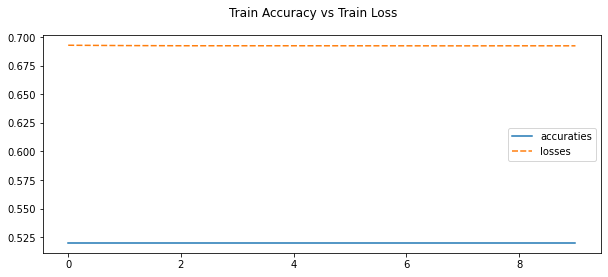

In [ ]:
# Plot train accuracy and loss
accuraties = history.history['accuracy']
losses = history.history['loss']
accuraties_losses = list(zip(accuraties,losses))

accuraties_losses_df = pd.DataFrame(accuraties_losses, columns={"accuraties", "losses"})

plt.figure(figsize=(10,4))
plt.suptitle("Train Accuracy vs Train Loss")
sns.lineplot(data=accuraties_losses_df)
plt.show()

In [ ]:
# SO FAR MAKES SENSE HERE 

In [ ]:
# Optimize the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the LSTM Model
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_data=(X_test, y_test))

Epoch 1/10
13/13 [==============================] - 71s 5s/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6921 - val_accuracy: 0.5232
Epoch 2/10
13/13 [==============================] - 72s 6s/step - loss: 0.6923 - accuracy: 0.5200 - val_loss: 0.6921 - val_accuracy: 0.5232
Epoch 3/10
13/13 [==============================] - 80s 6s/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6921 - val_accuracy: 0.5232
Epoch 4/10
13/13 [==============================] - 80s 6s/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6921 - val_accuracy: 0.5232
Epoch 5/10
13/13 [==============================] - 85s 7s/step - loss: 0.6923 - accuracy: 0.5200 - val_loss: 0.6921 - val_accuracy: 0.5232
Epoch 6/10
13/13 [==============================] - 77s 6s/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6921 - val_accuracy: 0.5232
Epoch 7/10
13/13 [==============================] - 80s 6s/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6921 - val_accuracy: 0.5232
Epoch 8/10
13/13 [==

In [ ]:
# Print the obtained loss and accuracy
print("Loss: {0}\nAccuracy: {1}".format(*model.evaluate(X_test, y_test, verbose=0)))

Loss: 0.6920915246009827
Accuracy: 0.5231612920761108


In [ ]:
# PREPARE HERE MODEL WITH ONLY ONE HIDDEN LAYER:!!!!!!!

# Build and compile the model
model2 = Sequential() # True

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            weights=[embedding_matrix],
                                            input_length=sequence_len,
                                            trainable=False)

model2.add(embedding_layer)
# model.add(Dropout(0.2))

# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.5))
model2.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
# model2.add(LSTM(64, return_sequences=False, dropout=0.5, recurrent_dropout=0.2)) ##evtl behalten
# model.add(Dense(16)) #behalten
# model.add(Dropout(rate=0.25))
model2.add(Dense(1, activation='relu'))
# model2.add(Dropout(rate=0.5))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Load pre-trained weights
#model.load_weights('model_weights.h5')

# Print the obtained loss and accuracy
print("Loss: {0}\nAccuracy: {1}".format(*model2.evaluate(X_test, y_test, verbose=0)))

Loss: 1.258014440536499
Accuracy: 0.44847798347473145


In [ ]:
# Define model architecture (EXAMPLE SOLUTION)
# sequence_input = Input(shape=(sequence_len, ), dtype='int32')
# embedding_sequences = embedding_layer(sequence_input)

# x = Conv1D(128, 5, activation='relu')(embedding_sequences)
# x = Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.2))(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# outputs = Dense(1, activation='sigmoid')(x)
# model = Model(sequence_input, outputs)
# model.summary()

In [ ]:
# Plot train accuracy and loss
# from keras.callbacks import History 
# history = History()
accuraties = history.history['acc']
losses = history.history['loss']
accuraties_losses = list(zip(accuraties,losses))

accuraties_losses_df = pd.DataFrame(accuraties_losses, columns={"accuraties", "losses"})

plt.figure(figsize=(10,4))
plt.suptitle("Train Accuracy vs Train Loss")
sns.lineplot(data=accuraties_losses_df)
plt.show()


KeyError: ignored

In [ ]:
# Evaluate the model
predicted = model.predict(X_test, verbose=1, batch_size=10000)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy = model.evaluate(X_test, y_test, batch_size=10000)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(y_test), y_predicted))

In [ ]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()